In [1]:
import os
import sys
import numpy as np

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')

print(sys.path)
%pwd

['/home/rfpred/notebooks', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode']


'/home/rfpred'

In [2]:
# import numpy as np
print(np.__file__)


/home/rfpred/envs/rfenv/lib/python3.11/site-packages/numpy/__init__.py


In [3]:
sys.executable


'/home/rfpred/envs/rfenv/bin/python3.11'

In [4]:
# !{sys.executable} -m pip list

In [5]:
# import funcs.rf_tools

In [6]:
# import all the functions within imgproc.py

from funcs.rf_tools import (get_dat, calculate_sigma, calculate_pRF_location, prf_plots_new, prf_plots, make_visrois_dict, 
                            make_gaussian_2d, make_circle_mask, css_gaussian_cut, roi_filter, write_prf_dict, 
                            get_mask, compare_masks, compare_heatmaps, prf_heatmap, get_img_prf, rsquare_selection, nsd_R2_dict)
from funcs.utility import print_dict_structure
from funcs.imgproc import show_stim

In [12]:
# !pip list
# !conda list

In [7]:
n_subjects = len(os.listdir('/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata'))

In [8]:
vismask_dict = make_visrois_dict(vox_count = 'y', bin_check = 'n', n_subjects=n_subjects)

Subject 1
V1_mask
Non-zero voxels in V1_mask: 7887
V2_mask
Non-zero voxels in V2_mask: 8296
V3_mask
Non-zero voxels in V3_mask: 7022
V4_mask
Non-zero voxels in V4_mask: 3976
Subject 2
V1_mask
Non-zero voxels in V1_mask: 6476
V2_mask
Non-zero voxels in V2_mask: 6376
V3_mask
Non-zero voxels in V3_mask: 6236
V4_mask
Non-zero voxels in V4_mask: 2887
Subject 3
V1_mask
Non-zero voxels in V1_mask: 7358
V2_mask
Non-zero voxels in V2_mask: 6721
V3_mask
Non-zero voxels in V3_mask: 5316
V4_mask
Non-zero voxels in V4_mask: 2486
Subject 4
V1_mask
Non-zero voxels in V1_mask: 5119
V2_mask
Non-zero voxels in V2_mask: 5088
V3_mask
Non-zero voxels in V3_mask: 4669
V4_mask
Non-zero voxels in V4_mask: 2790
Subject 5
V1_mask
Non-zero voxels in V1_mask: 6502
V2_mask
Non-zero voxels in V2_mask: 6309
V3_mask
Non-zero voxels in V3_mask: 5383
V4_mask
Non-zero voxels in V4_mask: 3184
Subject 6
V1_mask
Non-zero voxels in V1_mask: 6479
V2_mask
Non-zero voxels in V2_mask: 6905
V3_mask
Non-zero voxels in V3_mask: 71

In [9]:
prf_dict = write_prf_dict(binary_masks = vismask_dict)
# print_dict_structure(prf_dict)

In [10]:
R2_dict = nsd_R2_dict(vismask_dict)

Create dictionary for top n R2 explained variance voxels, both for the prf and nsd stimuli separately.

In [11]:
prf_rsq_dict = rsquare_selection(prf_dict, 1000, n_subjects = n_subjects, dataset = 'prf')
nsd_rsq_dict = rsquare_selection(R2_dict, 1000, n_subjects = n_subjects, dataset = 'nsd')

# print_dict_structure(rsq_dict)

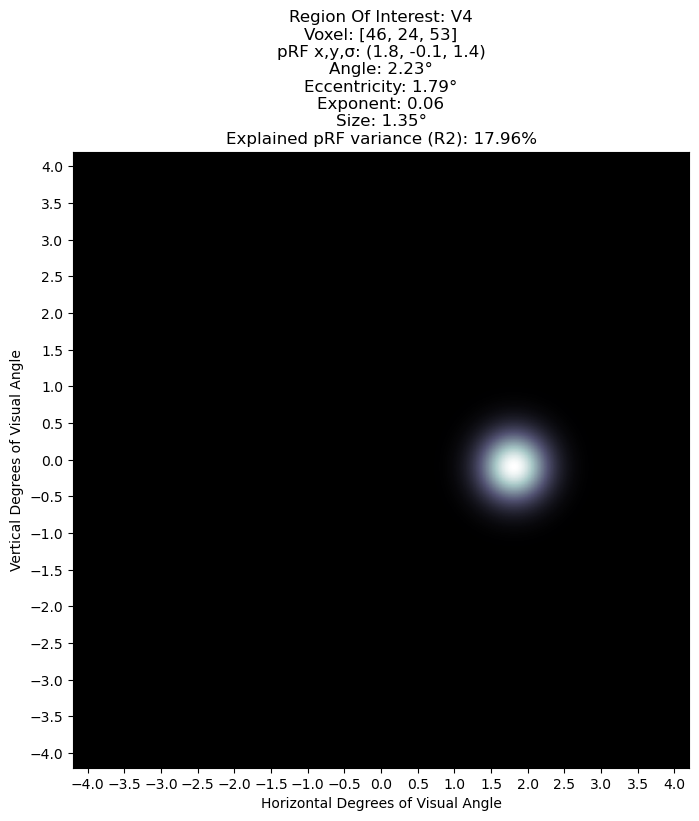

In [12]:
prf_info = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='gaussian', roi='V4',
                                        plot = 'y', excl_reason = 'n', sigma_min=.1, sigma_max = 4.2)


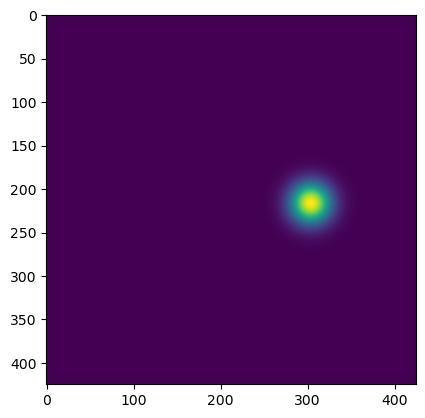

In [13]:
import matplotlib.pyplot as plt
import random
plo = np.zeros([2,5, 5])

plo[0,:,:] = np.ones([5,5])

plo

plt.imshow(prf_info['mask'])


mask
x
y
pix_radius
iterations
x_vox
y_vox
z_vox
x_deg
y_deg
angle
eccentricity
exponent
size
R2


5.05429

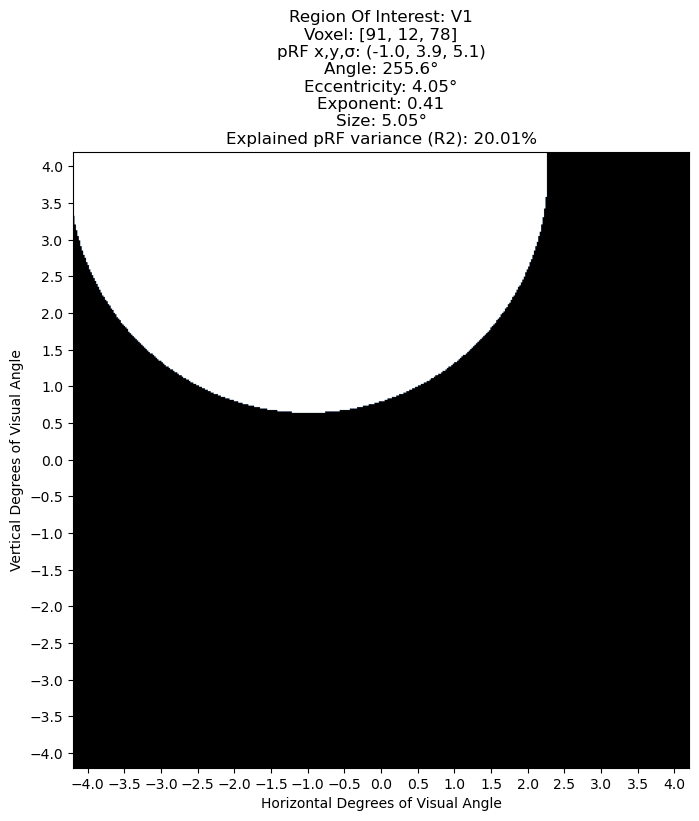

In [16]:
stront = get_mask(dim=425, subject='subj01', binary_masks = vismask_dict, 
                prf_proc_dict=prf_dict, type='circle', roi='V1',
                plot='y', excl_reason='n', sigma_min=1, sigma_max=4.2, rand_seed=None)

print_dict_structure(stront)

stront['size']

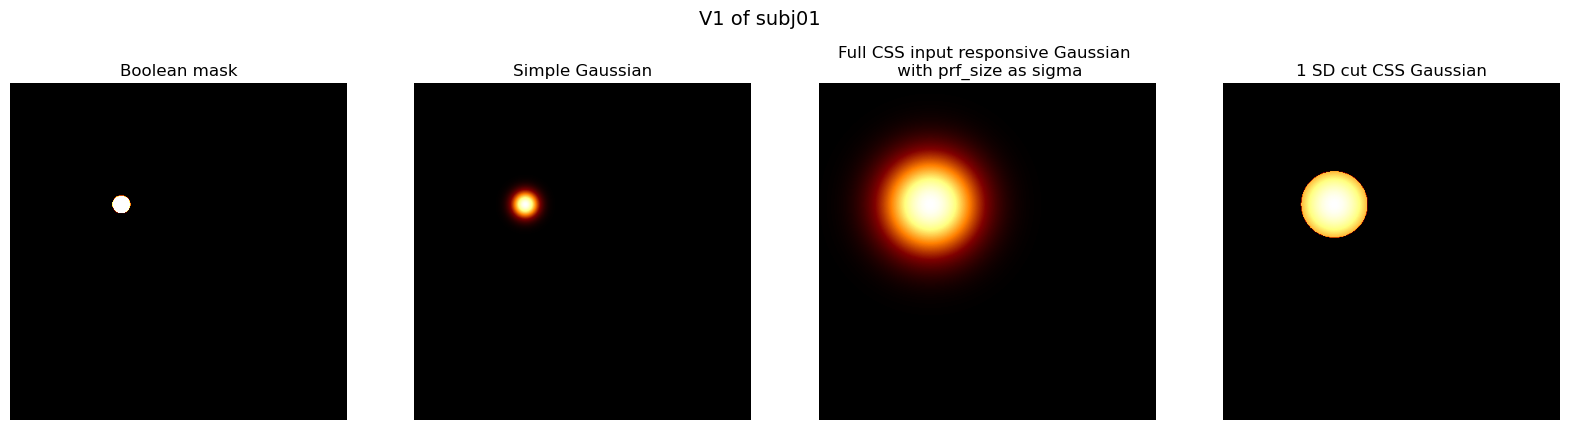

In [19]:
compare_masks(mask_dict =  vismask_dict, prf_dict = prf_dict)

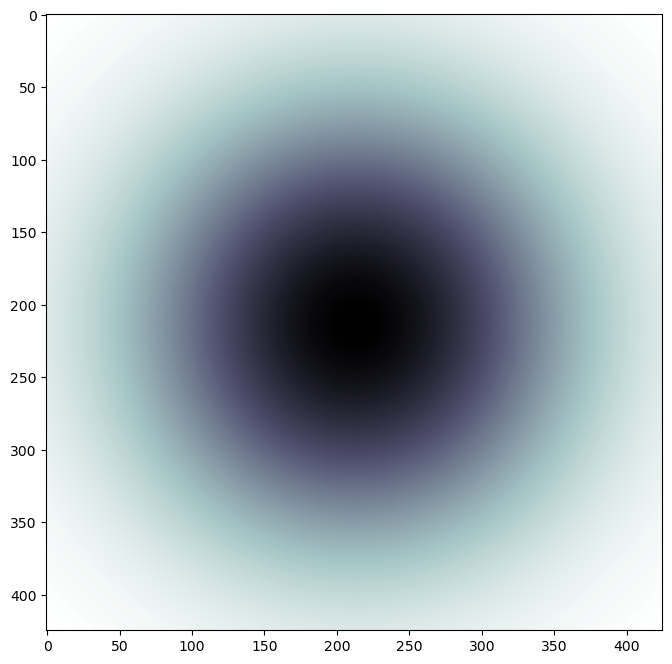

In [20]:
testmask = make_gaussian_2d(425, ((1 + 425) / 2), ((1 + 425) / 2), (2 * 425 / 8.4))

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(8,8))
ax.imshow((1 - testmask), cmap = 'bone')

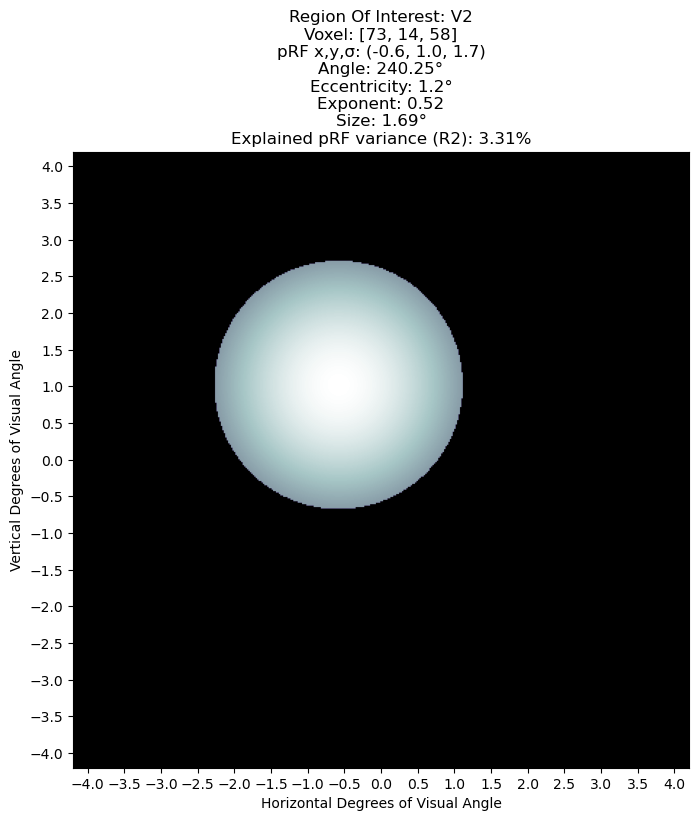

In [28]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='cut_gaussian', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2, rand_seed=11)


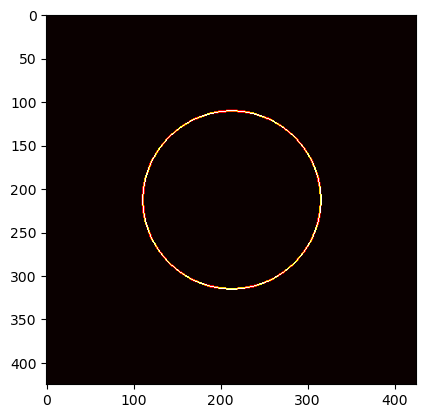

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [29]:
# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n', margin_width = 2)

plt.imshow(zirkel, cmap = 'hot')
plt.show()
with np.printoptions(threshold=np.inf):
    print(zirkel)

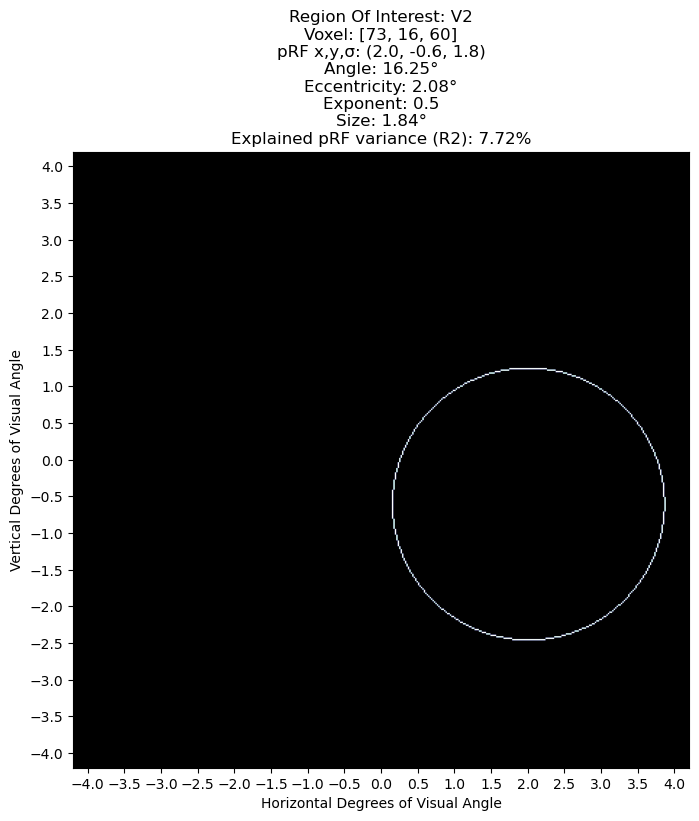

In [30]:
_ = get_mask(dim = 425, subject = 'subj01', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'n', sigma_min=1, sigma_max = 4.2)


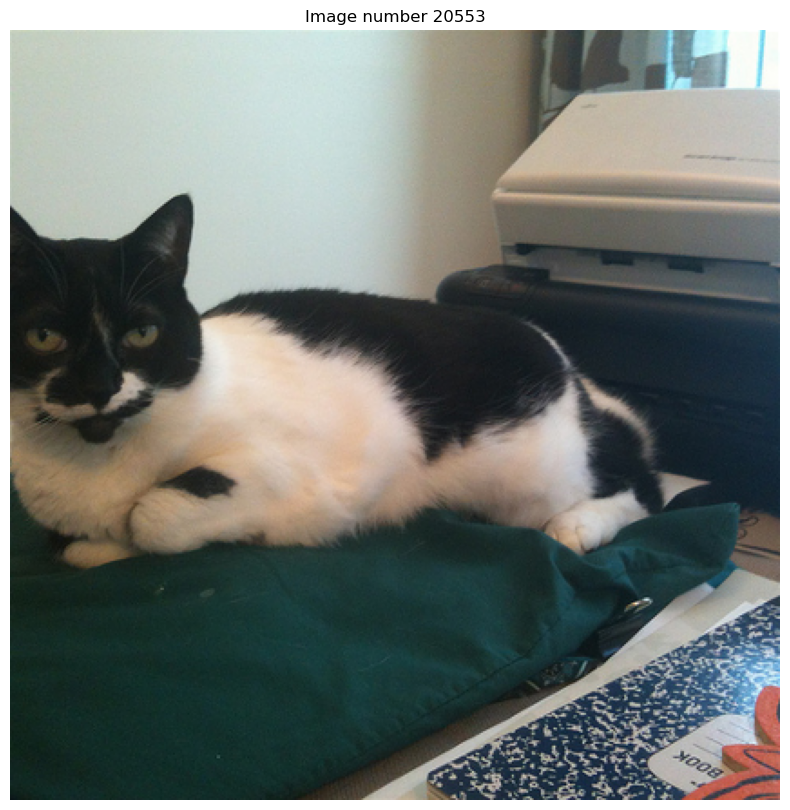

In [31]:
stim_img, img_no = show_stim()

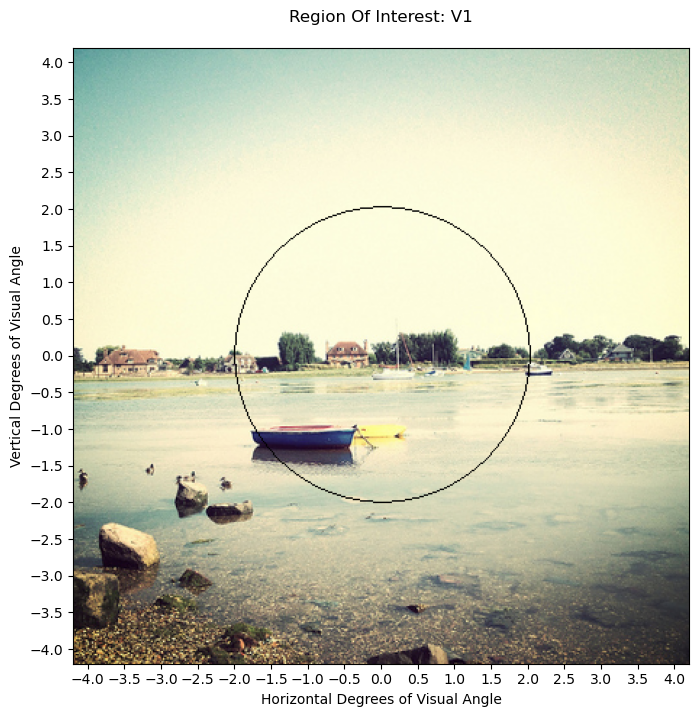

In [32]:
get_img_prf(show_stim(hide='y')[0], type='outline', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 4.2, rand_seed=None, invert='y', central = 'y')

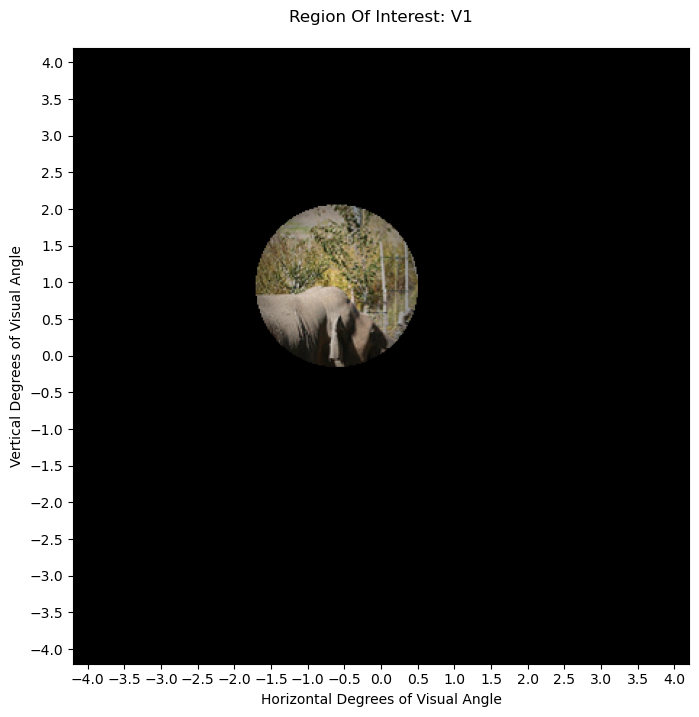

In [33]:


get_img_prf(show_stim(hide='y')[0], type='cut_gaussian', binary_masks = vismask_dict, 
            prf_proc_dict = prf_dict, roi = 'V1', sigma_min = .1, 
            sigma_max = 4.2, central='n', invert='n')

Okao nice this works, but I need to do this for every subj and every roi separately, so best to do it inside the heatmap function, as this one maps over that anyway, or well, it doesn't yet over the rois, but I can probably add that.

In [35]:
prf_rsq_dict['subj01']['V1_mask']

array([[92.     , 24.     , 78.     , 69.53096],
       [85.     , 28.     , 74.     , 69.54248],
       [91.     , 24.     , 77.     , 69.54836],
       ...,
       [63.     , 18.     , 74.     , 84.90852],
       [69.     , 12.     , 72.     , 85.07928],
       [64.     , 19.     , 74.     , 85.74335]])

In [36]:
print_dict_structure(nsd_rsq_dict)

subj01
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj02
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj03
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj04
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj05
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj06
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj07
    V1_mask
    V2_mask
    V3_mask
    V4_mask
subj08
    V1_mask
    V2_mask
    V3_mask
    V4_mask


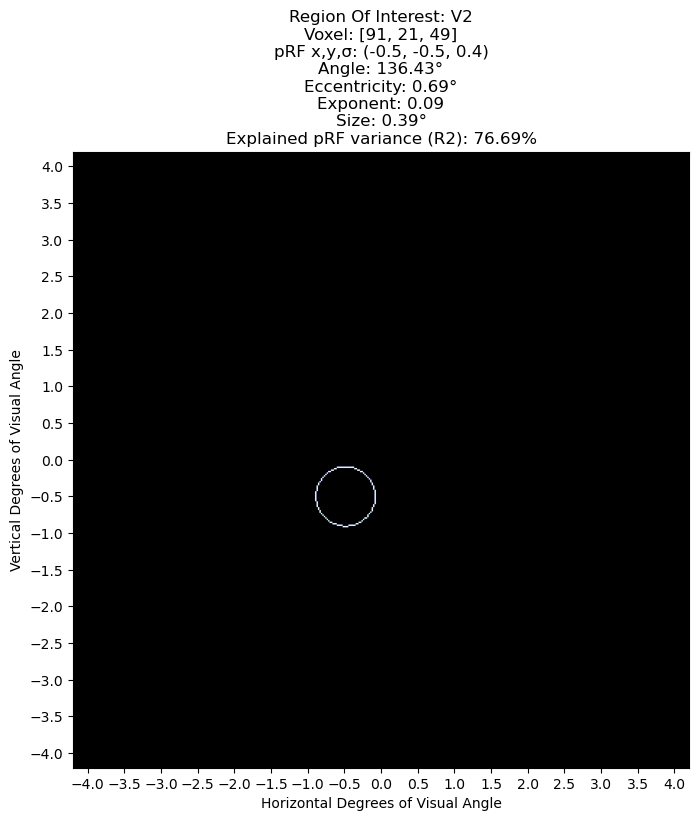

In [37]:


_ = get_mask(dim = 425, subject = 'subj05', binary_masks = vismask_dict, 
                                        prf_proc_dict = prf_dict, type='outline', roi='V2',
                                        plot = 'y', excl_reason = 'y', sigma_min=.1, sigma_max = 4.2, 
                                        filter_dict = nsd_rsq_dict)


In [ ]:
import numpy as np


kak = rsquare_selection(prf_dict, 1000, n_subjects=n_subjects)
print(np.max(prf_dict['subj01']['proc']['V1_mask']['R2']))
# Example larger array (7000, 4)
larger_array = prf_dict['subj01']['proc']['V1_mask']['R2']

# Example smaller array (100, 4)
  # Assuming it's a subset for the purpose of the example

# Extract x, y, z columns from the smaller array
smaller_xyz = kak['subj01']['V1_mask'][:, :3]

# Create a boolean mask for rows in the larger array where x, y, z match the smaller array
mask = np.any(np.all(larger_array[:, None, :3] == smaller_xyz, axis=-1), axis=1)

# Apply the boolean mask to get the filtered array
filtered_array = larger_array[mask]

# Example output shapes
print("Original Larger Array Shape:", larger_array.shape)
print("Filtered Array Shape:", filtered_array.shape)

# print(larger_array)
print('\n')
# print(smaller_xyz)

# print(filtered_array)

print(mask.shape)


smaller_xyz = rsq_dict['subj01']['V1_mask'][:, :3]
# filter = np.any(np.all(binary_masks[subject][f'{roi}_mask'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
filter = np.any(np.all(prf_dict['subj01']['proc']['V1_mask']['angle'][:, None, :3] == smaller_xyz, axis=-1), axis=1)

larger_array[filter].shape

107.0
Original Larger Array Shape: (7887, 4)
Filtered Array Shape: (1000, 4)


(7887,)


(1000, 4)

In [ ]:
musk = (np.ones((10,4))).astype(bool)

# print(kak['subj01']['V1_mask'][musk])

print(kak['subj03']['V1_mask'])

ui = range(0,2)

print(kak['subj01']['V1_mask'][ui])

# print(musk.astype(bool))
print(type(mask))

print(kak['subj01']['V1_mask'].shape[0])


[[68.      19.      51.      75.42703]
 [71.      14.      49.      75.43275]
 [77.      26.      51.      75.44907]
 ...
 [96.      23.      56.      88.07643]
 [97.      24.      56.      88.18322]
 [91.      15.      69.      88.27079]]
[[92.      24.      78.      69.53096]
 [85.      28.      74.      69.54248]]
<class 'numpy.ndarray'>
1000


In [ ]:
# def prf_select():
    # I want this to create a plot similar to the heatmaps, but also with the central circle in it. 
    # as arguments there need to be the amount of degrees that we want to see, and also a way of including a
    # strictness rule so you can choose whether the center or the entire pRF ought to be inside the center
    #
    

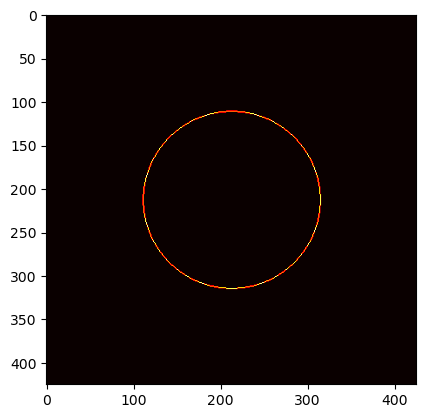

In [ ]:
# This is the circle that corresponds to the middle 4 degs
zirkel = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='n')

plt.imshow(zirkel, cmap = 'hot')
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(zirkel)

In [161]:
# # This class is to make sure that the heatmap can still be plotted if all pRF
# # options have been considered.
class AllPRFConsidered(Exception):
    pass

def get_mask(dim = 200, subject = 'subj01', binary_masks = None, 
             prf_proc_dict = None, type = 'full_gaussian', roi = 'V2', 
             plot = 'y', heatmap = 'n', prf_vec = None, iter = None, excl_reason = 'n', 
             sigma_min = 0, sigma_max = 4.2, ecc_max = 4.2, rand_seed = None, filter_dict = None, ecc_strict = None):

    if rand_seed == None:
        random.seed(random.randint(1, 1000000))
    else:
        random.seed(rand_seed)
    
    # Construct the variable name for binary mask using roi argument CHECK IF I USE THIS
    roi_flt = binary_masks[subject][f'{roi}_mask']
    
    # Create objects for all the required pRF data
    roi_mask_data = prf_proc_dict[subject]['proc'][f'{roi}_mask']
    angle_roi, ecc_roi, expt_roi, size_roi, rsq_roi= roi_mask_data['angle'], roi_mask_data['eccentricity'], roi_mask_data['exponent'], roi_mask_data['size'], roi_mask_data['R2']

    # Define a mask to filter away data rows based on the filter_dict, which is supposed to be
    # a dictionary that includes a subset of filtered values for every subject, roi, based on
    # another parameter, such as explained mean variance, R2.
    if filter_dict != None:
        smaller_xyz = filter_dict[subject][f'{roi}_mask'][:, :3]
        mask = np.any(np.all(angle_roi[:, None, :3] == smaller_xyz, axis=-1), axis=1)
    else:
        mask = range(0, angle_roi.shape[0])
    
    # Condition for when the function is used to plot a heatmap, set to 'y', or any other value to do so
    if heatmap == 'n':
        prf_vec = random.sample(range(angle_roi[mask].shape[0]), angle_roi[mask].shape[0])
        iter = 0

    max_prf_vec = max(prf_vec)  # Maximum value of prf_vec

    while True:
        if iter >= max_prf_vec:
            raise AllPRFConsidered("All potential pRFs have been considered")

        n = prf_vec[iter]
        iter += 1

        prf_angle, prf_ecc, prf_expt, prf_size, prf_rsq = angle_roi[mask][n][3], ecc_roi[mask][n][3], expt_roi[mask][n][3], size_roi[mask][n][3], rsq_roi[mask][n][3]
        x_vox, y_vox, z_vox = int(angle_roi[mask][n][0]), int(angle_roi[mask][n][1]), int(angle_roi[mask][n][2])

        sigma = prf_size * np.sqrt(prf_expt)
        sigma_pure = sigma * (dim / 8.4)
        outer_bound = prf_ecc
        
        # Condition to regulate the strictness of maximum eccentricity values
        if ecc_strict == 'y':
            outer_bound = prf_ecc + prf_size
        
        # Sinus is used to calculate height, cosinus width
        # so c_index is the y coordinate and r_index is the x coordinate. 
        # the * (dim / 8.4) is the factor to translate it into raw pixel values
        
        y = ((1 + dim) / 2) - (prf_ecc * np.sin(np.radians(-prf_angle)) * (dim / 8.4)) #y in pix (c_index)
        x = ((1 + dim) / 2) + (prf_ecc * np.cos(np.radians(prf_angle)) * (dim / 8.4)) #x in pix (r_index)

        degrees_per_pixel = 8.4 / dim

        if type == 'circle' or type == 'gaussian':
            deg_radius = sigma
            pix_radius = sigma_pure
        elif type == 'cut_gaussian' or type == 'full_gaussian' or type == 'outline':
            deg_radius = prf_size
            pix_radius = prf_size * (dim / 8.4)
            
        valid_conditions = (
            0 < x < dim,
            0 < y < dim,
            sigma_min < sigma,
            sigma < sigma_max,
            outer_bound < ecc_max,
            # prf_expt > 0
        )

        if all(valid_conditions):
            break

        # Check for argument option to print reason for excluding voxels
        elif excl_reason == 'y':
            print(f"Discarding pRF mask for voxel [{x_vox}, {y_vox}, {z_vox}] due to:")
            if not valid_conditions[0]:
                print("   - x out of bounds")
            if not valid_conditions[1]:
                print("   - y out of bounds")
            if not valid_conditions[2]:
                print("   - sigma_pure too small")
            if not valid_conditions[3]:
                print("   - sigma_pure too large")
            if not valid_conditions[4]:
                print(f"   -  pRF outside of center {2 * ecc_max}° visual degrees")
            # if not valid_conditions[4]:
            #     print("   - expt_ar value too small")

    # Note: all the masks are made using pixel values for x, y, and sigma
    # Check whether the same is done later on, in the heatmaps and get_img_prf.
    if type == 'gaussian':
        prf_mask = make_gaussian_2d(dim, x, y, sigma_pure)
    elif type == 'circle':
        prf_mask = make_circle_mask(dim, x, y, sigma_pure)
    elif type == 'full_gaussian':
        prf_mask = make_gaussian_2d(dim, x, y, prf_size * (dim / 8.4))
    elif type == 'cut_gaussian':
        prf_mask = css_gaussian_cut(dim, x, y, prf_size * (dim / 8.4))
    elif type == 'outline':
        prf_mask = (make_circle_mask(dim, x, y, prf_size * (dim / 8.4), fill = 'n'))
    else:
        raise ValueError(f"Invalid type: {type}. Available mask types are 'gaussian','circle','full_gaussian','cut_gaussian', and 'outline'.")
    
    # Convert pixel indices to degrees of visual angle
    x_deg = (x - (dim / 2)) * degrees_per_pixel
    y_deg = ((dim / 2) - y) * degrees_per_pixel
    
    if plot == 'y':
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.imshow(prf_mask, cmap='bone', origin='upper', extent=[-4.2, 4.2, -4.2, 4.2])
        ax.set_title(f'Region Of Interest: {roi}\n'
                    f'Voxel: [{x_vox}, {y_vox}, {z_vox}]\n'
                    f'pRF x,y,σ: {round(x_deg, 1), round(y_deg, 1), round(prf_size, 1)}\n'
                    f'Angle: {round(prf_angle, 2)}°\nEccentricity: {round(prf_ecc, 2)}°\n'
                    f'Exponent: {round(prf_expt, 2)}\nSize: {round(prf_size, 2)}°\n'
                    f'Explained pRF variance (R2): {round(prf_rsq, 2)}%')
        ax.set_xlabel('Horizontal Degrees of Visual Angle')
        ax.set_ylabel('Vertical Degrees of Visual Angle')

        # Set ticks at every 0.1 step
        ax.xaxis.set_major_locator(MultipleLocator(0.5))
        ax.yaxis.set_major_locator(MultipleLocator(0.5))

            # Create a dictionary to store the values
    prf_output_dict = {
        'mask': prf_mask,
        'x': x,
        'y': y,
        'pix_radius': pix_radius,
        'iterations': iter,
        'x_vox': x_vox,
        'y_vox': y_vox,
        'z_vox': z_vox,
        'x_deg': x_deg,
        'y_deg': y_deg,
        'angle': prf_angle,
        'eccentricity': prf_ecc,
        'exponent': prf_expt,
        'size': prf_size,
        'R2': prf_rsq
    }

        # Return the dictionary
    return prf_output_dict

In [162]:
# class AllPRFConsidered(Exception):
#     pass

def prf_heatmap(n_prfs, binary_masks, prf_proc_dict, dim=425, mask_type='gaussian', cmap='gist_heat', 
                roi='V2', sigma_min=1, sigma_max=25, ecc_max = 4.2, print_prog='n', excl_reason = 'n', subjects='all',
                outline_degs = None, filter_dict = None, fill_outline = 'n', plot_heat = 'y', ecc_strict = None):
    
    outline_surface = np.pi * outline_degs**2
    prf_sumstack = []
    prf_sizes = []
    total_prfs_found = 0
    if subjects == 'all':
        subjects = list(binary_masks)
    else:
        subjects = [subjects]
        
    # To make sure that the maximum amount of pRFs that is searched through is adapted to the individual
    for subject in subjects:
        # This is to make sure that the random sampling is done correctly, for different restrictions on the amount of
        # pRFs to sample from. This can be restricted through exclusion criteria, or for example the filter_dict.
        if filter_dict != None:
            smaller_xyz = filter_dict[subject][f'{roi}_mask'][:, :3]
            # filter = np.any(np.all(binary_masks[subject][f'{roi}_mask'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
            filter = np.any(np.all(prf_proc_dict[subject]['proc'][f'{roi}_mask']['angle'][:, None, :3] == smaller_xyz, axis=-1), axis=1)
            roi_flt = filter_dict[subject][f'{roi}_mask'].shape[0] # Amount of voxels in top rsq dict for subj, roi
            prf_vec = random.sample(range(roi_flt), roi_flt) # Create random vector to shuffle order voxels to consider
            
        else:
            filter = range(0, prf_proc_dict[subject]['proc'][f'{roi}_mask']['angle'].shape[0])
            roi_flt = binary_masks[subject][f'{roi}_mask'] # This is the total number of voxels for subj, roi
            prf_vec = random.sample(range(np.sum(roi_flt)), np.sum(roi_flt)) # Idem dito as in the 'if' part
            
        # FIX THIS STILL!!!
        if n_prfs == 'all':
            # n_prfs_subject = np.sum(binary_masks[subject][f'{roi}_mask']) # This does not work
            n_prfs_subject = random.randint(10,20)
        else:
            n_prfs_subject = n_prfs

        # Create an empty array to fill with the masks
        prf_single = np.zeros([dim, dim, n_prfs_subject])

        iter = 0
        end_premat = False
        for prf in range(n_prfs_subject):
            try:
                # prf_single[:, :, prf], _, _, _, new_iter = get_mask(dim=dim,
                prf_dict = get_mask(dim=dim,
                                    subject=subject,
                                    binary_masks=binary_masks,
                                    prf_proc_dict=prf_proc_dict,
                                    type=mask_type,
                                    roi=roi,
                                    plot='n',
                                    heatmap='y',
                                    prf_vec=prf_vec,
                                    iter=iter,
                                    sigma_min=sigma_min,
                                    sigma_max=sigma_max,
                                    ecc_max = ecc_max,
                                    excl_reason=excl_reason,
                                    filter_dict = filter_dict,
                                    ecc_strict = ecc_strict)
                prf_single[:, :, prf] = prf_dict['mask']
                iter = prf_dict['iterations']
                prf_size = prf_dict['size']
                prf_sizes.append(prf_size)
                if print_prog == 'y':
                    print(f"Subject: {subject}, Voxel {prf+1} out of {n_prfs_subject} found")
                    if (prf+1) == n_prfs_subject:
                        print('\n')
            except AllPRFConsidered:
                if prf >= n_prfs_subject:
                    print(f'All potential pRFs have been considered at least once.\n'
                        f'Total amount of pRFs found: {len(prf_sizes)}')
                    end_premat = True
                    
                break  # Exit the loop immediately
        
        prf_sumstack.append(np.mean(prf_single, axis=2))
        total_prfs_found += len(prf_sizes)
         
    avg_prf_surface = np.pi * np.mean(prf_sizes)**2
    relative_surface = round(((avg_prf_surface / outline_surface) * 100), 2)
    # Combine heatmaps of all subjects
    prf_sum_all_subjects = np.mean(np.array(prf_sumstack), axis=0)
    outline = make_circle_mask(425, 213, 213, outline_degs * 425/8.4, fill=fill_outline)
    # Create a circle outline if an array is provide in the outline argument (should be same dimensions, binary)
    prf_sum_all_subjects += (np.max(prf_sum_all_subjects) * outline) if outline_degs is not None else 1

    # Display the plot
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(prf_sum_all_subjects, cmap=cmap, origin='lower', extent=[-4.2, 4.2, -4.2, 4.2])
    ax.set_title(f'Region Of Interest: {roi}\n'
                 f'Spatial restriction of central {2 * ecc_max}° visual angle\n'
                 f'Average pRF radius: {round(np.mean(prf_sizes), 2)}°, {relative_surface}% of outline surface\n'
                 f'Total amount of pRFs found: {total_prfs_found}')
    ax.set_xlabel('Horizontal Degrees of Visual Angle')
    ax.set_ylabel('Vertical Degrees of Visual Angle')
    cbar = plt.colorbar(im, ax=ax, shrink = .6)
    cbar.set_label('pRF density')  
    
    # Set ticks at every 0.1 step
    ax.xaxis.set_major_locator(MultipleLocator(0.5))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))

    if plot_heat == 'n':
        plt.close()
    else: 
        plt.show()

    return prf_sum_all_subjects, iter, end_premat, roi, prf_sizes, relative_surface, total_prfs_found

In [166]:
# Function to compare the heatmaps on different bases, need to add different comparison types, than just roi. For now suffices
def compare_heatmaps(n_prfs, binary_masks = None, prf_proc_dict = None, filter_dict = None, basis = 'roi', 
                     mask_type = 'cut_gaussian', cmap = 'CMRmap', roi = 'V1', excl_reason = 'n', sigma_min = 0, 
                     sigma_max = 4.2, ecc_max = 2, print_prog = 'n', outline_degs = None, fill_outline = 'n', ecc_strict = None):
    
    if basis == 'roi':
        rois = sorted(prf_proc_dict['subj01']['proc'].keys())
    
    def plot_mask(ax, mask, title, last = None):
        ax.imshow(mask, cmap = cmap)
        ax.set_title(title)
        ax.axis('off')
        ax.set_xlabel('Horizontal Degrees of Visual Angle')
        ax.set_ylabel('Vertical Degrees of Visual Angle')
        # if last == 'y':
        #     cbar = plt.colorbar(heatmap, ax=ax, shrink = .6)
        #     cbar.set_label('pRF density') 
            
    fig, axs = plt.subplots(1, 4, figsize = (20,5))
    
    for n, roi in enumerate(rois):    
        heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found = prf_heatmap(n_prfs, binary_masks=binary_masks, prf_proc_dict=prf_proc_dict,
                                                                        mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason = excl_reason,
                                                                        sigma_min=sigma_min, sigma_max = sigma_max, ecc_max = ecc_max, 
                                                                        print_prog = print_prog, subjects='all', outline_degs = outline_degs, 
                                                                        filter_dict = filter_dict, fill_outline = fill_outline, plot_heat = 'n', 
                                                                        ecc_strict = ecc_strict)
        # if n == (len(rois)):
        #     last_plot = 'y'
        # else:
        #     last_plot = 'n'
        plot_mask(axs[n], heatmap, f'{roi}\n Average pRF radius: {round(np.mean(prf_sizes), 2)}°, {rel_surf}% of outline surface\n'
                  f'Total amount of pRFs found: {total_prfs_found}')
        
 
    
    plt.tight_layout()
    plt.show()
        


In [173]:
def compare_heatmaps(n_prfs, binary_masks=None, prf_proc_dict=None, filter_dict=None, basis='roi',
                     mask_type='cut_gaussian', cmap='CMRmap', roi='V1', excl_reason='n', sigma_min=0,
                     sigma_max=4.2, ecc_max=2, print_prog='n', outline_degs=None, fill_outline='n', ecc_strict=None):
    if basis == 'roi':
        rois = sorted(prf_proc_dict['subj01']['proc'].keys())

    def plot_mask(ax, mask, title, last=None):
        img = ax.imshow(mask, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
        ax.set_xlabel('Horizontal Degrees of Visual Angle')
        ax.set_ylabel('Vertical Degrees of Visual Angle')
        if last == 'y':
            cbar = plt.colorbar(img, ax=ax, pad=0.01)  # Ensure colorbar placement
            cbar.set_label('pRF density')

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    for n, roi in enumerate(rois):
        heatmap, iter, end_premat, roi, prf_sizes, rel_surf, total_prfs_found = prf_heatmap(
            n_prfs, binary_masks=binary_masks, prf_proc_dict=prf_proc_dict,
            mask_type=mask_type, cmap=cmap, roi=roi[:2], excl_reason=excl_reason,
            sigma_min=sigma_min, sigma_max=sigma_max, ecc_max=ecc_max,
            print_prog=print_prog, subjects='all', outline_degs=outline_degs,
            filter_dict=filter_dict, fill_outline=fill_outline, plot_heat='n',
            ecc_strict=ecc_strict)

        last_plot = 'y' if n == (len(rois) - 1) else 'n'
        plot_mask(axs[n], heatmap, f'{roi}\n Average pRF radius: {round(np.mean(prf_sizes), 2)}°, {rel_surf}% of outline surface\n'
                  f'Total amount of pRFs found: {total_prfs_found}', last=last_plot)

    plt.tight_layout()
    plt.show()

# Example usage
# compare_heatmaps(n_prfs=your_n_prfs_data, prf_proc_dict=your_prf_proc_dict)


Subject: subj01, Voxel 1 out of 26 found
Subject: subj01, Voxel 2 out of 26 found
Subject: subj01, Voxel 3 out of 26 found
Subject: subj01, Voxel 4 out of 26 found
Subject: subj01, Voxel 5 out of 26 found
Subject: subj01, Voxel 6 out of 26 found
Subject: subj01, Voxel 7 out of 26 found
Subject: subj01, Voxel 8 out of 26 found
Subject: subj01, Voxel 9 out of 26 found
Subject: subj01, Voxel 10 out of 26 found
Subject: subj01, Voxel 11 out of 26 found
Subject: subj01, Voxel 12 out of 26 found
Subject: subj01, Voxel 13 out of 26 found
Subject: subj01, Voxel 14 out of 26 found
Subject: subj01, Voxel 15 out of 26 found
Subject: subj01, Voxel 16 out of 26 found
Subject: subj01, Voxel 17 out of 26 found
Subject: subj01, Voxel 18 out of 26 found
Subject: subj01, Voxel 19 out of 26 found
Subject: subj01, Voxel 20 out of 26 found
Subject: subj01, Voxel 21 out of 26 found
Subject: subj01, Voxel 22 out of 26 found
Subject: subj01, Voxel 23 out of 26 found
Subject: subj01, Voxel 24 out of 26 found
S

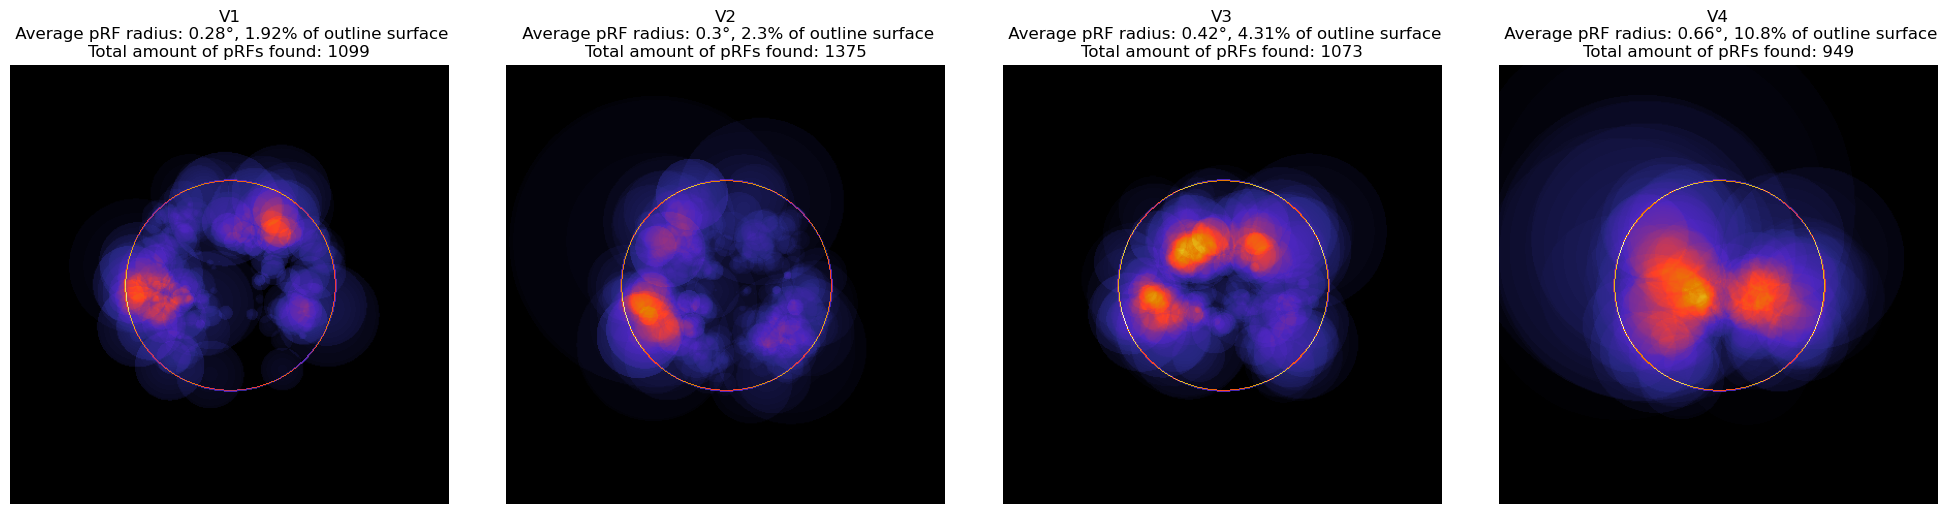

In [145]:
compare_heatmaps(n_prfs = 'all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y')

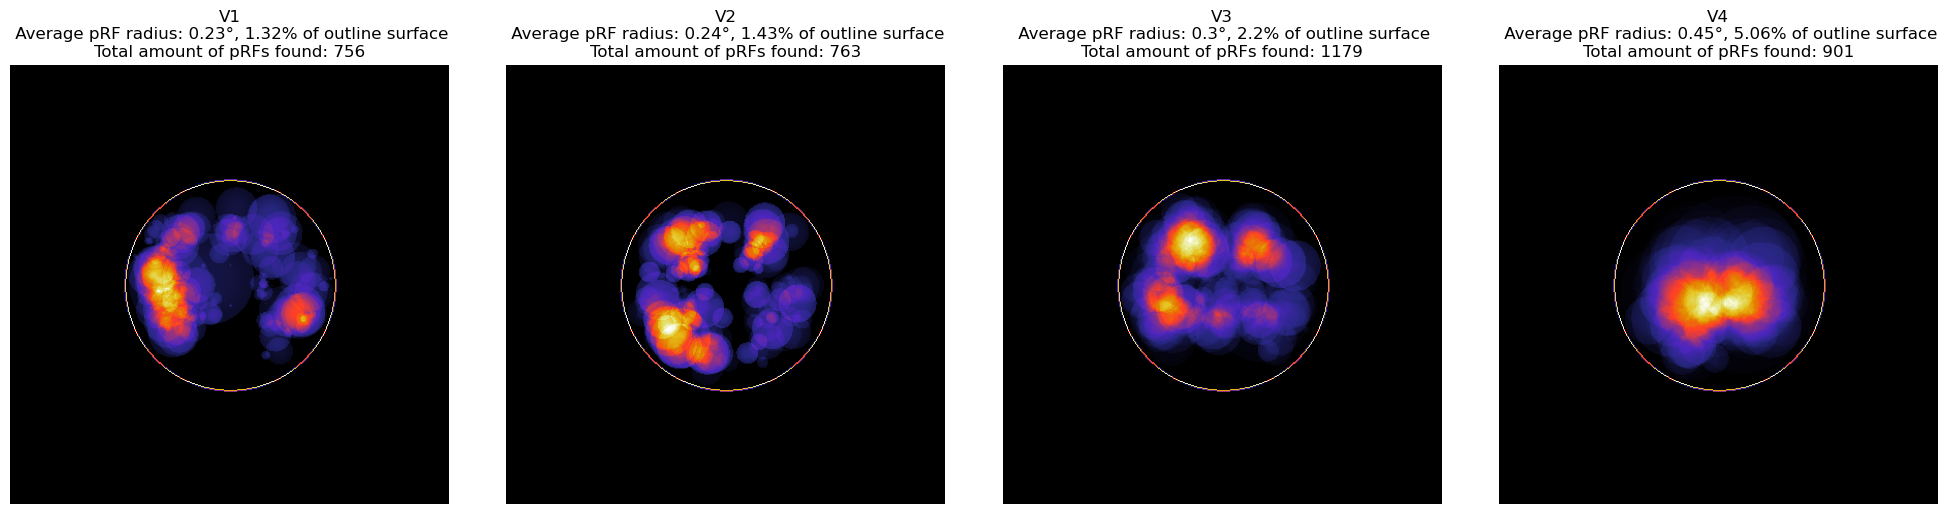

In [146]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = 0, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'n', ecc_strict = 'y')

What you see is that including a filter dict makes the code run a lot faster, which makes sense as you use only 1000 voxels instead of +-7500

Subject: subj08, Voxel 1 out of 20 found
Subject: subj08, Voxel 2 out of 20 found
Subject: subj08, Voxel 3 out of 20 found
Subject: subj05, Voxel 1 out of 15 found
Subject: subj05, Voxel 2 out of 15 found
Subject: subj05, Voxel 3 out of 15 found
Subject: subj05, Voxel 4 out of 15 found
Subject: subj08, Voxel 1 out of 20 found
Subject: subj08, Voxel 2 out of 20 found
Subject: subj03, Voxel 1 out of 20 found
Subject: subj03, Voxel 2 out of 20 found
Subject: subj03, Voxel 3 out of 20 found
Subject: subj03, Voxel 4 out of 20 found
Subject: subj03, Voxel 5 out of 20 found
Subject: subj08, Voxel 1 out of 15 found
Subject: subj03, Voxel 1 out of 11 found
Subject: subj04, Voxel 1 out of 15 found
Subject: subj04, Voxel 2 out of 15 found
Subject: subj04, Voxel 3 out of 15 found
Subject: subj05, Voxel 1 out of 20 found
Subject: subj05, Voxel 2 out of 20 found


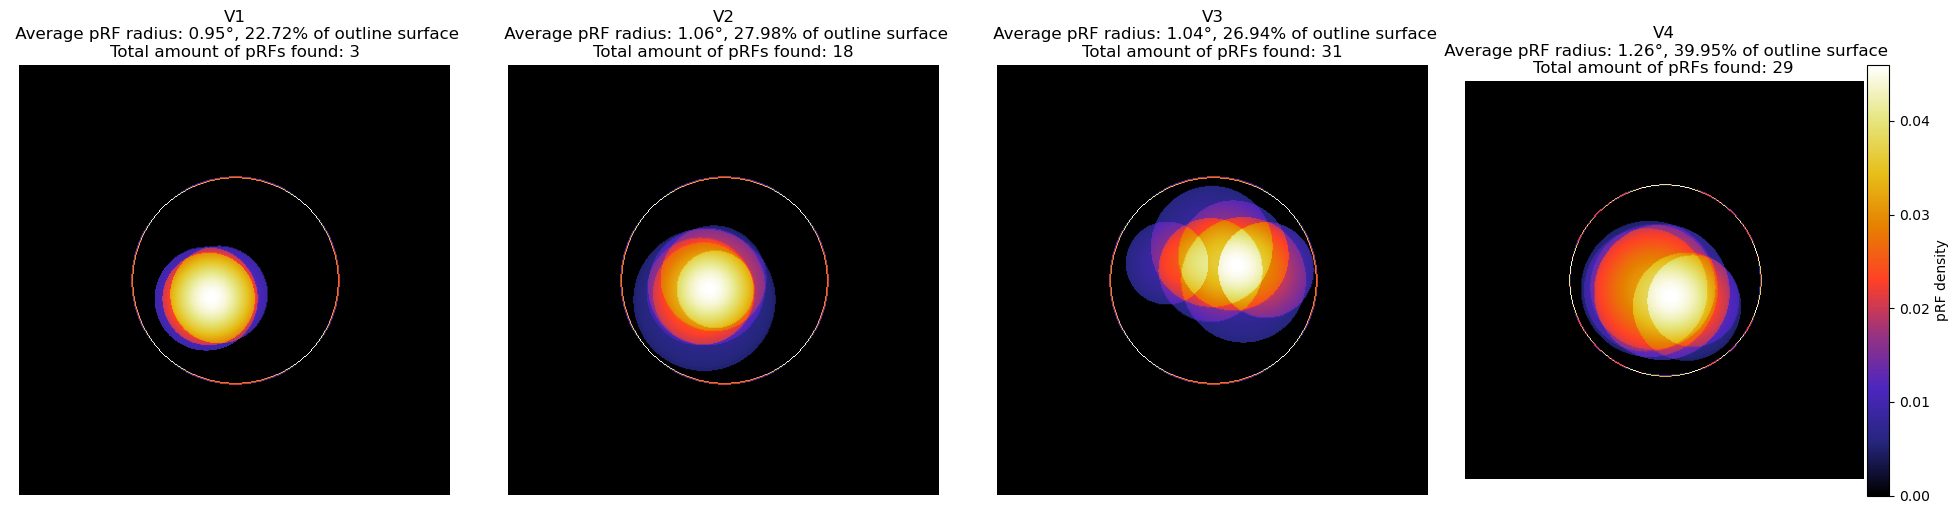

In [174]:
compare_heatmaps('all', binary_masks = vismask_dict, prf_proc_dict = prf_dict,
                 mask_type = 'cut_gaussian', cmap = 'CMRmap',
                 sigma_min = .5, sigma_max = 4.2, ecc_max = 2, outline_degs = 2, 
                 filter_dict = nsd_rsq_dict, excl_reason = 'n', print_prog = 'y', ecc_strict = 'y')

Subject: subj01, Voxel 1 out of 13 found
Subject: subj01, Voxel 2 out of 13 found
Subject: subj01, Voxel 3 out of 13 found
Subject: subj01, Voxel 4 out of 13 found
Subject: subj01, Voxel 5 out of 13 found
Subject: subj01, Voxel 6 out of 13 found
Subject: subj01, Voxel 7 out of 13 found
Subject: subj01, Voxel 8 out of 13 found
Subject: subj01, Voxel 9 out of 13 found
Subject: subj01, Voxel 10 out of 13 found
Subject: subj01, Voxel 11 out of 13 found
Subject: subj01, Voxel 12 out of 13 found
Subject: subj01, Voxel 13 out of 13 found


Subject: subj02, Voxel 1 out of 45 found
Subject: subj02, Voxel 2 out of 45 found
Subject: subj02, Voxel 3 out of 45 found
Subject: subj02, Voxel 4 out of 45 found
Subject: subj02, Voxel 5 out of 45 found
Subject: subj02, Voxel 6 out of 45 found
Subject: subj02, Voxel 7 out of 45 found
Subject: subj02, Voxel 8 out of 45 found
Subject: subj02, Voxel 9 out of 45 found
Subject: subj02, Voxel 10 out of 45 found
Subject: subj02, Voxel 11 out of 45 found
Subject:

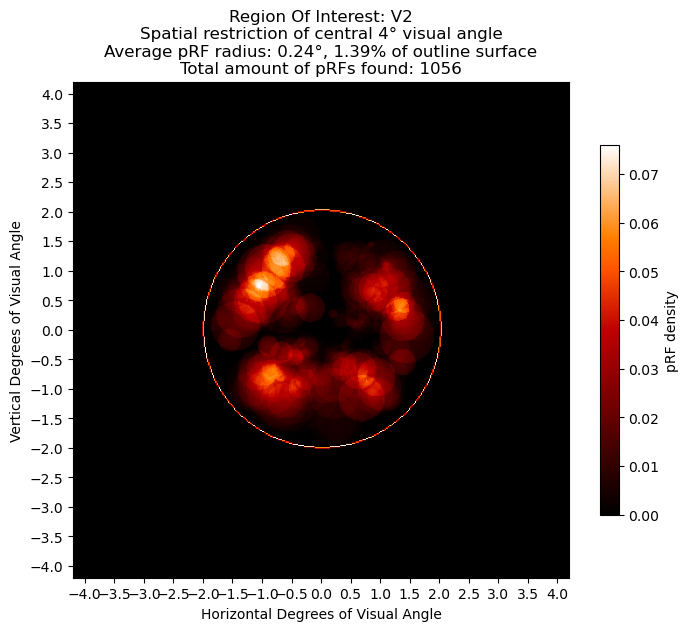

Runtime: 8.198 seconds
There were 37 out of 8296 pRFs considered


In [138]:
# Working heatmap call script.
import random
import time

start = time.time()

heatmap, iter, end_premat, roi, prf_sizes, avg_surf = prf_heatmap('all', binary_masks=vismask_dict, prf_proc_dict=prf_dict,
                                                        mask_type='cut_gaussian', cmap='gist_heat', print_prog='y', 
                                                        roi='V2', sigma_min=0, sigma_max = 4.2, ecc_max = 2, subjects='all', 
                                                        outline_degs = 2, 
                                                        filter_dict = nsd_rsq_dict, ecc_strict = 'y')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

(425, 425)


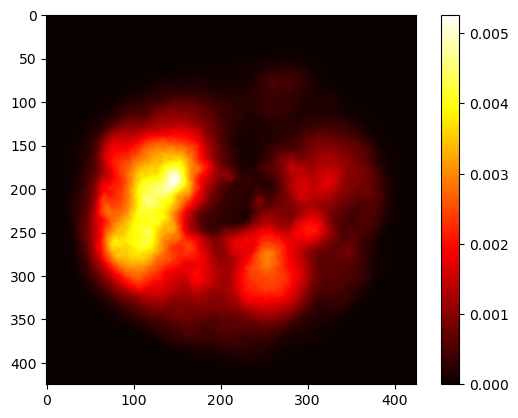

[[0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      

In [53]:
print(heatmap.shape)
# PERHAPS ADD AN OPTION IN THE HEATMAP FUNCTION TO DO THIS FILL SHIT<

middle_filter = make_circle_mask(425, 213, 213, 4 * 425/8.4, fill='y', margin_width = 1)

plt.imshow(np.flipud(middle_filter) * np.flipud(heatmap), cmap = 'hot')
plt.colorbar()
plt.show()
with np.printoptions(threshold=np.inf):
    print(np.flipud(middle_filter) * np.flipud(heatmap))




Subject: subj01, Voxel 1 out of 10 found
Subject: subj01, Voxel 2 out of 10 found
Subject: subj01, Voxel 3 out of 10 found
Subject: subj01, Voxel 4 out of 10 found
Subject: subj01, Voxel 5 out of 10 found
Subject: subj01, Voxel 6 out of 10 found
Subject: subj01, Voxel 7 out of 10 found
Subject: subj01, Voxel 8 out of 10 found
Subject: subj01, Voxel 9 out of 10 found
Subject: subj01, Voxel 10 out of 10 found


Subject: subj02, Voxel 1 out of 10 found
Subject: subj02, Voxel 2 out of 10 found
Subject: subj02, Voxel 3 out of 10 found
Subject: subj02, Voxel 4 out of 10 found
Subject: subj02, Voxel 5 out of 10 found
Subject: subj02, Voxel 6 out of 10 found
Subject: subj02, Voxel 7 out of 10 found
Subject: subj02, Voxel 8 out of 10 found
Subject: subj02, Voxel 9 out of 10 found
Subject: subj02, Voxel 10 out of 10 found


Subject: subj03, Voxel 1 out of 10 found
Subject: subj03, Voxel 2 out of 10 found
Subject: subj03, Voxel 3 out of 10 found
Subject: subj03, Voxel 4 out of 10 found
Subject: s

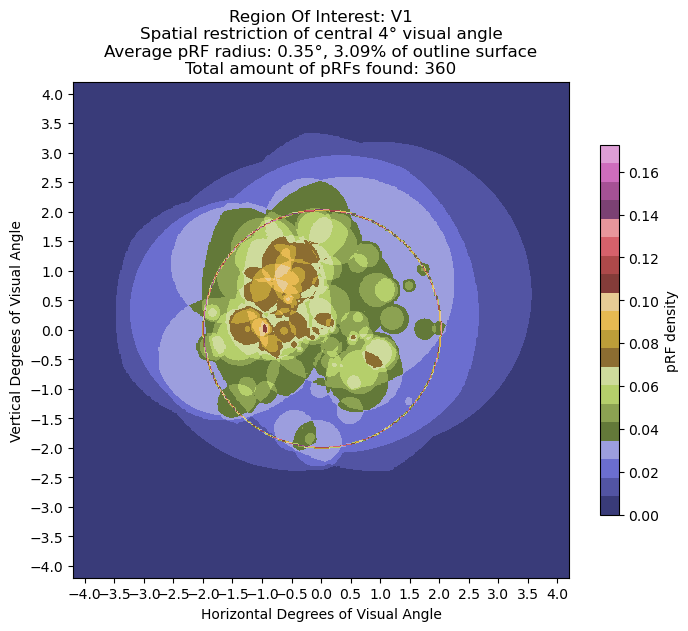

Runtime: 2.097 seconds
There were 21 out of 7887 pRFs considered


In [139]:
# Working heatmap call script.
from matplotlib.ticker import MultipleLocator

import time


start = time.time()

heatmap_full, iter, end_premat, roi, prf_sizes, avg_surf = prf_heatmap(10, binary_masks=vismask_dict, prf_proc_dict=prf_dict, 
                                                  mask_type='cut_gaussian', cmap='tab20b',print_prog='y', roi='V1', 
                                                  sigma_min=0, sigma_max=4.2, ecc_max = 2, subjects='all', 
                                                  outline_degs = 2, ecc_strict = 'n')

end = time.time()
print("Runtime:", np.round(end - start, 3), "seconds")

if end_premat is not True:
    print("There were", iter, "out of", np.sum(vismask_dict['subj01'][f'{roi}_mask']), "pRFs considered")

(425, 425)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


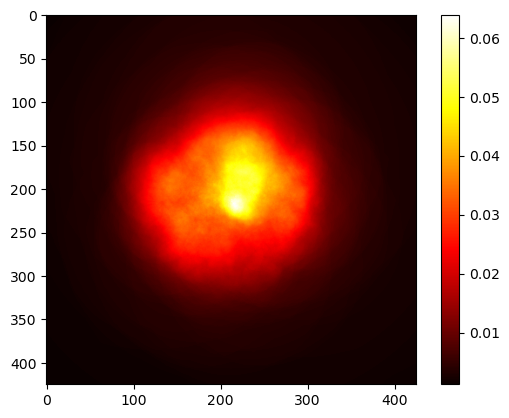

In [88]:
print(heatmap.shape)


middle_filter = make_circle_mask(425, 213, 213, 2 * 425/8.4, fill='y', margin_width = 100)


print(middle_filter)
# plt.imshow(np.flipud(middle_filter) + np.flipud(heatmap_full), cmap = 'tab10')
plt.imshow(heatmap_full - 1, cmap = 'hot')
plt.colorbar()
plt.show()
# with np.printoptions(threshold=np.inf):
#     print(np.flipud(middle_filter) * np.flipud(heatmap_full))




In [ ]:
# !{sys.executable} -m pip install nsdcode # This does not work, the ones below do
# !{sys.executable} -m pip install -r /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/requirements.txt
# !{sys.executable} -m pip install /home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode/.


In [ ]:

# !{sys.executable} -m pip install numpy